# **Приоритизация гипотез и анализ A/B тестирование для крупного интеренет-магазина.**



**Описание проекта**

Работа с гипотезами для увеличения выручки в крупном интернет магазине.

В ходе исследования мы приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

Сначала изучим входящие данные и приведем их к надлежащему качеству, если потребуется. Затем выполним приоритизацию гипотез двумя методами. И проанализируем A/B тестирование.

**Описание данных**



**Файл hipothesis.csv**

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.




**Файл orders.csv**

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.



**Файл visitors.csv**

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**План работы:**
1. Анализ и предобработка данных
2. Приоритизация гипотез
3. Анализ A/B тестирования
4. Вывод

# **Изучение и предобработка данных.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [ ]:
try:
    data = pd.read_csv('/content/drive/MyDrive/DA/datasets/hypothesis.csv', sep=',')
except:
    data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [ ]:
try:
    orders = pd.read_csv('/content/drive/MyDrive/DA/datasets/orders.csv', sep=',')
except:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [ ]:
try:
    visitors = pd.read_csv('/content/drive/MyDrive/DA/datasets/visitors.csv', sep=',')
except:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Переименную названия столбцов, для удобства работы с данными.

In [ ]:
data.columns = data.columns.str.lower()
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

А также исправлю формат данных для дат.

In [ ]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим данные на нулевые значения и дубликаты.

In [ ]:
data.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [ ]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [ ]:
dup_group = orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()
dup_group

group    58
dtype: int64

In [ ]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors.duplicated().sum()

0

В целом данные чистые, пропусков и дубликатов нет. Приступим к исследованию.

# **Приоритизация гипотез**

Для начала, проведем приоритизацию самым популярным методом ICE.

In [ ]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data['ICE'] = data['ICE'].round(2)
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style.set_properties(**{'text-align': 'left'})

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


На основании этих данных, можно смело выделить 5 гипотез с наивысшим приоритетом.



---



---



Теперь применим метод RICE.

In [ ]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).style.set_properties(**{'text-align': 'left'})

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000


Гипотезы остались прежние, однако их приоритеты поменялись. Метод RICE выводит более точные данные, благодаря тому, что в этом методе добавлены значения, показывающие скольких пользователей затронет изменение, которое хотите внести.

Приоритет гипотез, без учета скольких пользователей затронет изменение (ICE):
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Приоритет гипотез, с учетом скольких пользователей затронет изменение (RICE):
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. Запустить акцию, дающую скидку на товар в день рождения


# **Анализ A/B-теста**

## **1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.**

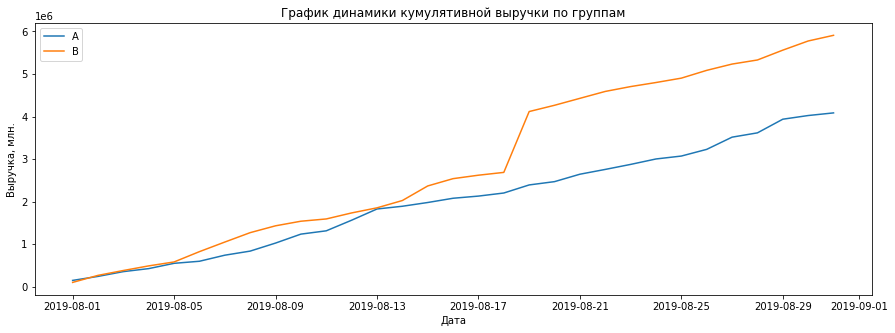

In [ ]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам')
plt.ylabel("Выручка, млн.")
plt.xlabel("Дата")
plt.legend()
plt.show()

На этом графике мы видим, что во второй половине теста группа В резко вырвалась вперед и продолжила рост. Вероятнее всего, повлияли аномалии в данных.

## **2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.**

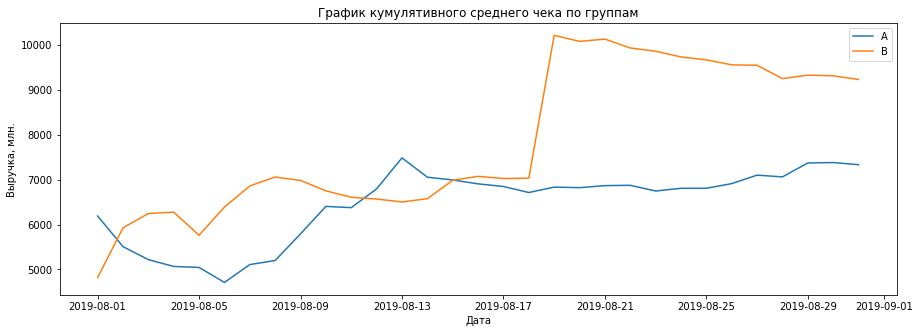

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка, млн.")
plt.xlabel("Дата")
plt.legend()
plt.show()

Этот график тоже показывает резкий всплеск у группы В. Плюс колебания. Не очень информативно. Нужно проверить данные на аномалии.

## **3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.**

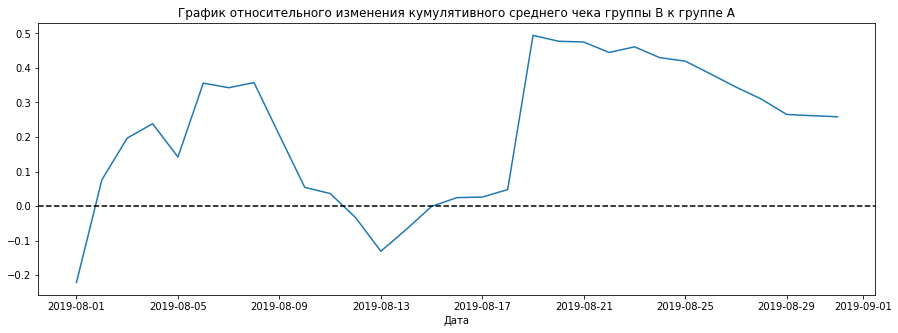

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("Дата")
plt.show()

Результаты теста сильно менялись по датам. Скорее всего в эти даты и есть аномальные данные.

## **4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.**

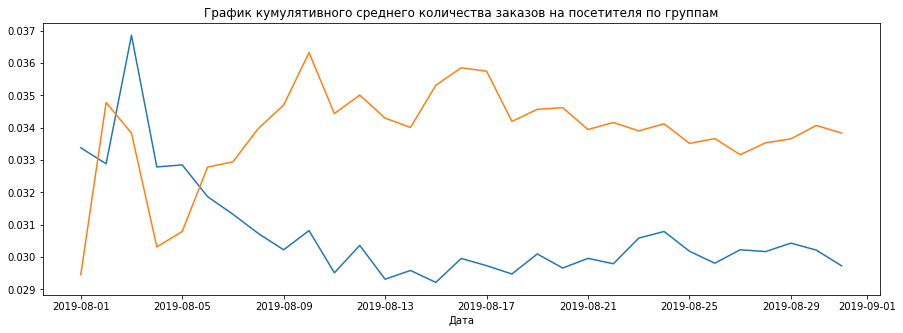

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel("Дата")
plt.show()

На этом графике мы видим сильные колебание вначале теста, потом среднее количество заказов на посетителя выравнивается и группа В показывает лучшие результаты.

## **5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.**

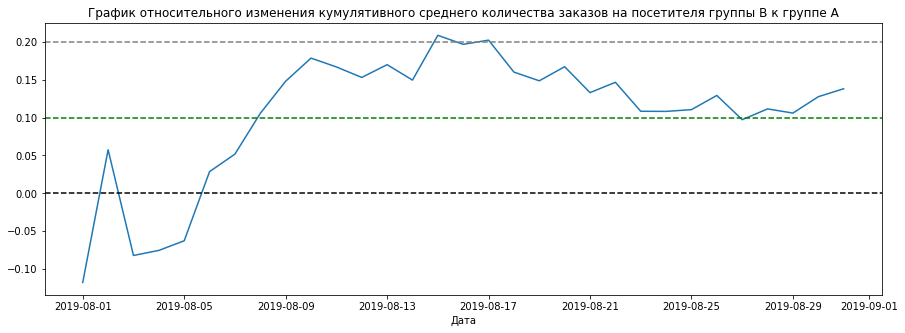

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel("Дата")
plt.show()

Вначале теста мы видим всплеск, но после него группа В показывает лучшие результаты.

## **6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.**

In [ ]:
orders_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_user = orders_user.rename(columns = {'transaction_id': 'orders_count'})

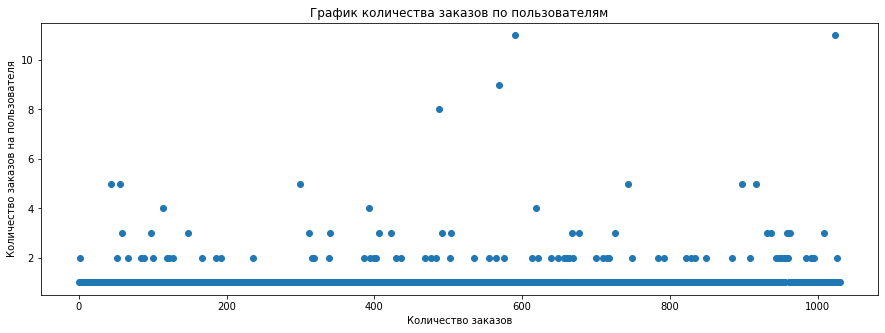

In [ ]:
x_values = pd.Series(range(0,len(orders_user)))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders_user['orders_count']) 
plt.title('График количества заказов по пользователям')
plt.ylabel("Количество заказов на пользователя")
plt.xlabel("Количество заказов")
plt.show()

На графике видно, что основное количество заказов на одного пользователя от 1 до 3. Дальше посчитаем перцентили количества заказов.

## **7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [ ]:
np.percentile(orders_user['orders_count'], [95, 99])

array([2., 4.])

Тут мы видим, что только 1% клиентов делал более 4 заказов. Возьмем это значений как границу аномалий.

## **8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.**

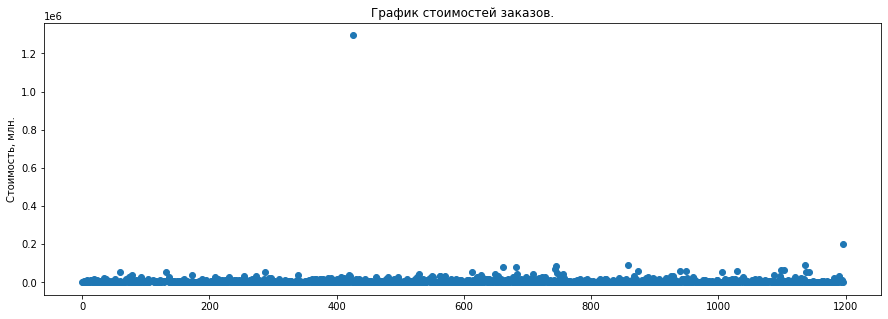

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов.')
plt.ylabel("Стоимость, млн.")
plt.show()

На графике мы видим 2 явные аномалии, которые повлияют на результат исследования. Ниже мы избавимся от аномалий.

Построим график без двух явных аномалий, чтобы посмотреть распределение стоимостей заказов.

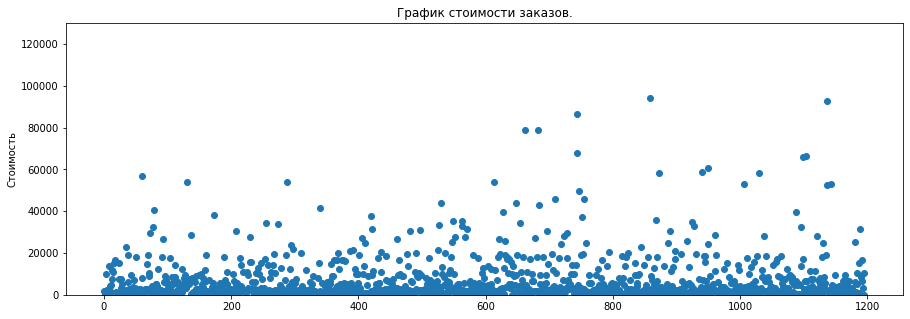

In [ ]:
plt.figure(figsize=(15, 5))
plt.ylim(0, 130000)
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов.')
plt.ylabel("Стоимость")
plt.show()

На графике видно, что без аномалий стоимость заказа не превышает и 10000.

## **9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

На основании этих данных, выберу границу аномальных значений 99% перцентиля - это 58233.2.

## **10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.**

Сформулируем нулевую и альтернативную гипотезы:

    Н0 - различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.
    Н1 - различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.
    
Для исследования использую значение alpha = 0,05

Т.к. распределение значений в каждой выборке может не соответствовать нормальному распределению, мы будем применять метод Манна-Уитни для сравнения средних значений двух независимых выборок.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('P-value:', "{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост В к А:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.01679
Относительный прирост В к А: 0.138


Отвергаем нулевую гипотезу, т.к. P-value значительно меньше 0.05, что говорит нам о том, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к группе А равен 13,8%.

## **11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.**

Сформулируем нулевую и альтернативную гипотезы:

    Н0 - нет различий в среднем чеке между группами по «сырым» данным.
    Н1 - есть различия в среднем чеке между группами по «сырым» данным.
    
Для исследования использую значение alpha = 0,05

Метод, который будем применять для A/B-тестирования, называется st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»).

In [ ]:
print('P-value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост В к А:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительный прирост В к А: 0.259


Т.к. P-value значительно больше 0.05, это значит, что статистически значимых отличий в среднем чеке заказа между группами нет и мы не отвергаем нулевую гипотезу. Однако относительное различие среднего чека между группами 25,9%.

## **12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.**

Создам 2 переменные с аномальными значениями в количестве заказов и стоимости заказов, для удобства их отсечения в дальнейшем анализе. И очистим данные от аномалий.

In [ ]:
many_orders =  np.percentile(orders_user['orders_count'], 99)
much_revenue = np.percentile(orders['revenue'], 99)

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > many_orders]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > much_revenue]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

Сформулируем нулевую и альтернативную гипотезы:

    Н0 - различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.
    Н1 - различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.
    
Для исследования использую значение alpha = 0,05

Метод, который будем применять для A/B-тестирования, называется st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»).

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value:', '{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост В к А:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.01438
Относительный прирост В к А: 0.153


Отвегаем нулевую гипотезу, т.к. P-value в очищенных данных значительно меньше 0.05, что говорит нам о том, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к группе А увеличился до 15,3%.

## **13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.**

Сформулируем нулевую и альтернативную гипотезы:

    Н0 - нет различий в среднем чеке между группами по «сырым» данным.
    Н1 - есть различия в среднем чеке между группами по «сырым» данным.
    
Для исследования использую значение alpha = 0,05

Метод, который будем применять для A/B-тестирования, называется st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»).

In [ ]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.851
-0.006


Не отвергаем нулевую гипотезу, т.к. P-value значительно больше 0.05, это значит, что статистически значимых отличий в среднем чеке заказа между группами нет. Различия среднего чека между группами практически нет.

# **Выводы**

Группа В показывает лучшие результаты в приросте среднего количества заказов на пользователя относительно группа А. Средний чек, практически, одинаков. На основании этого исследования тест можно останавливать и зафиксировать победу группы В.